<a href="https://colab.research.google.com/github/MuhammadDanyialKhan/Google-Colaboratory-Notebooks/blob/master/MNIST_Handwriting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# import tensorflow and tfds
import tensorflow as tf
tfds.disable_progress_bar()
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten

# import helper libs
import math
import numpy as np
import matplotlib.pyplot as plt

# print tf version
print(tf.__version__)

tf.disable_eager_execution()

1.14.0


In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Import the MNIST dataset

In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Let's inspect a few examples. The MNIST dataset contains only grayscale images. For more advanced image datasets, we'll have the three color channels (RGB).

# Explore Data

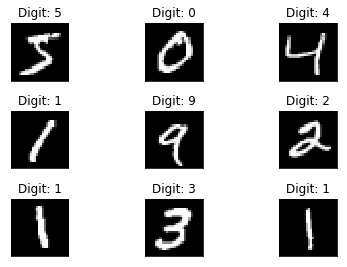

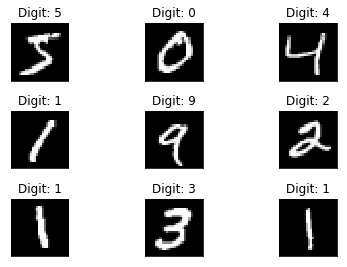

In [0]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig


In order to train our neural network to classify images we first have to unroll the height x width pixel format into one big vector - the input vector. So its length must be 28.28 = 784 . But let's graph the distribution of our pixel values.

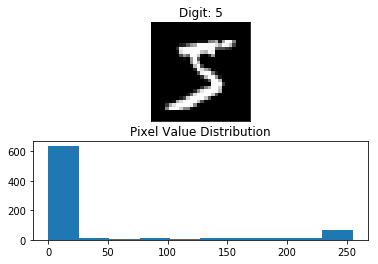

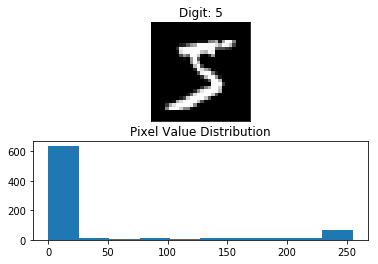

In [0]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig


So far the truth (Y in machine learning) we'll use for training still holds integer values from 0 to 9.

## Data Preprocessing

As expected, the pixel values range from 0 to 255: the background majority close to 0, and those close to 255 representing the digit.

Normalizing the input data helps to speed up the training. Also, it reduces the chance of getting stuck in local optima, since we're using stochastic gradient descent to find the optimal weights for the network.

Let's reshape our inputs to a single vector vector and normalize the pixel values to lie between 0 and 1.

In [0]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [0]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


Let's encode our categories - digits from 0 to 9 - using one-hot encoding. The result is a vector with a length equal to the number of categories. The vector is all zeroes except in the position for the respective category. Thus a '5' will be represented by [0,0,0,0,1,0,0,0,0].

In [0]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


# Building the Network

In [0]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

# Compiling and Training the Model

In [0]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [0]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>0.998):
                print("\nReached 99.8% accuracy so cancelling training!")
                self.model.stop_training = True

In [0]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 10s - loss: 0.2527 - acc: 0.9244 - val_loss: 0.1020 - val_acc: 0.9686
Epoch 2/20
 - 9s - loss: 0.0997 - acc: 0.9690 - val_loss: 0.0922 - val_acc: 0.9708
Epoch 3/20
 - 9s - loss: 0.0726 - acc: 0.9766 - val_loss: 0.0679 - val_acc: 0.9758
Epoch 4/20
 - 9s - loss: 0.0557 - acc: 0.9820 - val_loss: 0.0671 - val_acc: 0.9805
Epoch 5/20
 - 9s - loss: 0.0465 - acc: 0.9848 - val_loss: 0.0665 - val_acc: 0.9811
Epoch 6/20
 - 9s - loss: 0.0385 - acc: 0.9875 - val_loss: 0.0612 - val_acc: 0.9810
Epoch 7/20
 - 9s - loss: 0.0367 - acc: 0.9882 - val_loss: 0.0635 - val_acc: 0.9825
Epoch 8/20
 - 9s - loss: 0.0306 - acc: 0.9901 - val_loss: 0.0710 - val_acc: 0.9812
Epoch 9/20
 - 9s - loss: 0.0263 - acc: 0.9914 - val_loss: 0.0651 - val_acc: 0.9837
Epoch 10/20
 - 9s - loss: 0.0262 - acc: 0.9908 - val_loss: 0.0631 - val_acc: 0.9833
Epoch 11/20
 - 9s - loss: 0.0246 - acc: 0.9918 - val_loss: 0.0655 - val_acc: 0.9822
Epoch 12/20
 - 9s - loss: 0.0192 -

## Ploting the matrices

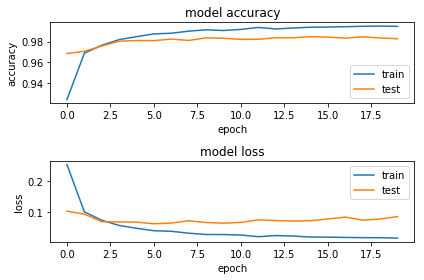

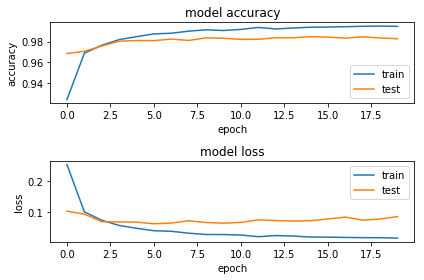

In [0]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

# Evaluate Model

In [0]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 2.353478409957886
Test Accuracy 0.0985



985  classified correctly
9015  classified incorrectly


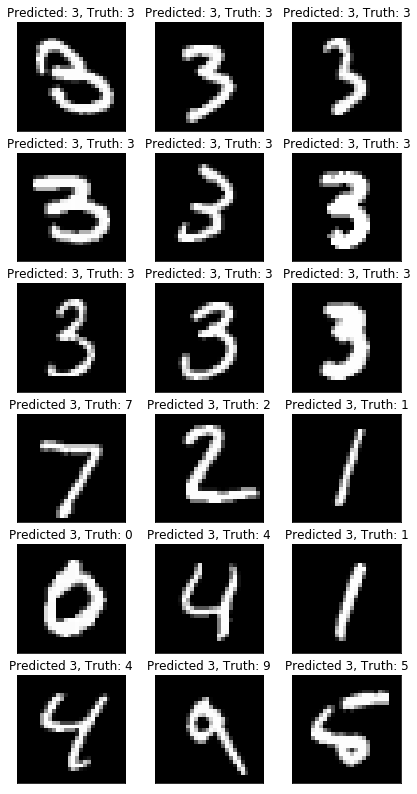

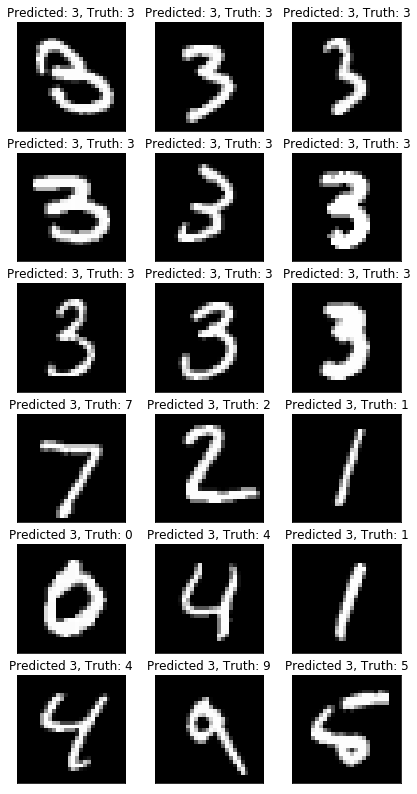

In [0]:
# load the model and create predictions on the test set
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation